# Load and Explore Dataset
--> How to handle outliers? 

In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [2]:
pd.set_option('display.float_format',  '{:,}'.format)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 100)

In [ ]:
# df  = pd.read_csv("housing-classification-iter5.csv")

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/JoanClaverol/housing_data/main/housing-classification-iter6.csv')

In [4]:
df.head(40)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,MSZoning,Condition1,Heating,Street,CentralAir,...,MasVnrType,BsmtFinType2,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,RL,Norm,GasA,Pave,Y,...,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,RL,Feedr,GasA,Pave,Y,...,None,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,RL,Norm,GasA,Pave,Y,...,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,RL,Norm,GasA,Pave,Y,...,None,Unf,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,RL,Norm,GasA,Pave,Y,...,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,14115,85.0,796,1,0,0,2,40,0,0,RL,Norm,GasA,Pave,Y,...,None,Unf,Ex,SBrkr,Typ,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,10084,75.0,1686,3,1,0,2,255,0,1,RL,Norm,GasA,Pave,Y,...,Stone,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,10382,NaN,1107,3,2,0,2,235,0,0,RL,PosN,GasA,Pave,Y,...,Stone,BLQ,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,6120,51.0,952,2,2,0,2,90,0,0,RM,Artery,GasA,Pave,Y,...,None,Unf,Gd,FuseF,Min1,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,7420,50.0,991,2,2,0,1,0,0,0,RL,Artery,GasA,Pave,Y,...,None,Unf,Ex,SBrkr,Typ,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [ ]:
#df.isna().sum()

In [ ]:
#df.duplicated().sum() # Boolean series1

In [ ]:
# df.hist(figsize= (10,10), bins=20)

In [ ]:
# df.describe()

# Split X and y --> then split into test and training set

In [ ]:
# X and y creation
y = df.pop("Expensive")

In [ ]:
X = df.copy()
X.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,...,MasVnrType,BsmtFinType2,HeatingQC,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,RL,Norm,GasA,Pave,Y,PConc,...,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,RL,Feedr,GasA,Pave,Y,CBlock,...,None,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,RL,Norm,GasA,Pave,Y,PConc,...,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,RL,Norm,GasA,Pave,Y,BrkTil,...,None,Unf,Gd,SBrkr,Typ,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,RL,Norm,GasA,Pave,Y,PConc,...,BrkFace,Unf,Ex,SBrkr,Typ,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create a branched Pipeline for model

In [ ]:
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").copy().columns
X_num_columns = X.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(SimpleImputer(strategy='mean'))

# create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown = "ignore")
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)

In [ ]:
dtree = DecisionTreeClassifier()

# Decision Tree


In [ ]:
# 2. Put together the pipeline
full_pipeline = make_pipeline(preprocessor, dtree)

# 3. Fit the pipeline to the training data
full_pipeline.fit(X_train, y_train)
 
# 4. Use the pipeline to make predictions
full_pipeline.predict(X_train)

array([1, 0, 1, ..., 1, 0, 0])

#  Check accuracy

In [ ]:
# make predictions
y_pred_train = full_pipeline.predict(X_train)
y_pred_train

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
# Check accuracy on the train set
accuracy_score(y_true = y_train,
               y_pred = y_pred_train
              )

1.0

In [ ]:
# make predicitons on the test set
y_pred_test = full_pipeline.predict(X_test)

In [ ]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_test
              )

0.9212328767123288

# Apply K-Fold Cross Validation to find best combination of parameters: 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }

In [ ]:
search = GridSearchCV(full_pipeline, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use, 
                      verbose=1) # we want informative outputs during the training process

In [ ]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAd...
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                        

In [ ]:
search.predict (X_train)

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 8,
 'decisiontreeclassifier__min_samples_leaf': 7,
 'decisiontreeclassifier__min_samples_split': 8}

In [ ]:
scores = {"dtree" : search.best_score_}
scores

{'dtree': 0.9409155937052931}

In [ ]:
#search.cv_results_

# Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_full_pipeline = make_pipeline(preprocessor,
                                  RandomForestClassifier(min_samples_leaf = 2, random_state = 43859)
                                 )
param_grid = [{
    #'randomforestclassifier__max_depth': [11, 12, 13],
    'randomforestclassifier__max_features': [19, 20, 21],
    'randomforestclassifier__n_estimators': [120, 130, 140]
}]

rf_search = GridSearchCV(rf_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

rf_search.fit(X_train, y_train)

rf_search.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.9503356443270606

In [ ]:
rf_search.best_params_

{'randomforestclassifier__max_features': 19,
 'randomforestclassifier__n_estimators': 120}

# Model KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_full_pipeline = make_pipeline(preprocessor,
                                  KNeighborsClassifier()
                                 )
from sklearn.model_selection import GridSearchCV

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean"],
    "kneighborsclassifier__n_neighbors": range (4,10), 
    "kneighborsclassifier__metric": ["minkowski", 'l1', 'l2'], 
    "kneighborsclassifier__weights": ["distance"],
    "kneighborsclassifier__algorithm" : ["ball_tree"]
}

knn_search = GridSearchCV(knn_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

knn_search.fit(X_train, y_train)

knn_search.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use

0.9297934778621473

In [ ]:
knn_search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
 'kneighborsclassifier__algorithm': 'ball_tree',
 'kneighborsclassifier__metric': 'l1',
 'kneighborsclassifier__n_neighbors': 6,
 'kneighborsclassifier__weights': 'distance'}

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

log_full_pipeline = make_pipeline(preprocessor,
                                  # StandardScaler(),
                                  LogisticRegression()
                                 )
from sklearn.model_selection import GridSearchCV

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "logisticregression__penalty": ["none", "l2", "l1", "elasticnet"]
}

log_search = GridSearchCV(log_full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

log_search.fit(X_train, y_train)

log_search.best_score_

# Support Vector Machine

# Classification Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(search.predict (X_test), y_test)
cf_matrix

array([[239,  12],
       [ 11,  30]])

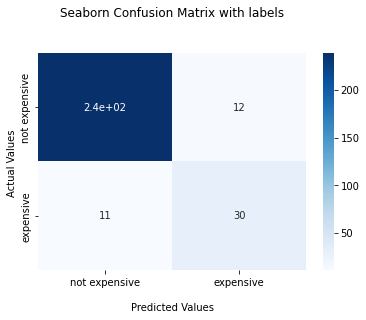

In [ ]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['not expensive','expensive'])
ax.yaxis.set_ticklabels(['not expensive','expensive'])

## Display the visualization of the Confusion Matrix.
plt.show()

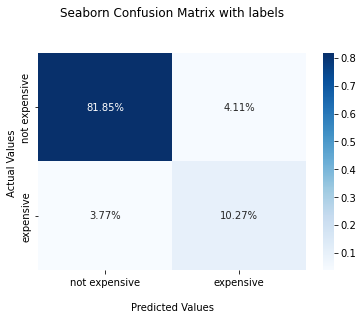

In [ ]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['not expensive','expensive'])
ax.yaxis.set_ticklabels(['not expensive','expensive'])

## Display the visualization of the Confusion Matrix.
plt.show()


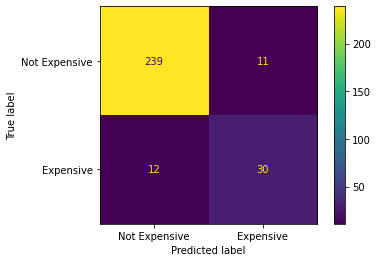

In [ ]:
ConfusionMatrixDisplay.from_estimator(search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive'])

In [ ]:
from sklearn.metrics import accuracy_score

# accuracy score on the test set
accuracy_score(rf_search.predic (X_test), y_test)

0.9657534246575342

In [ ]:
recall_score(search.predict(X_test), y_test)

In [ ]:
precision_score(search.predict(X_test), y_test)

In [ ]:
f1_score(search.predict(X_test), y_test)

In [ ]:
cohen_kappa_score(search.predict(X_test), y_test)

# External Test set

In [ ]:
url = "https://drive.google.com/file/d/15PfmTxmavQCT-f7iY9tgwWxm9t4GRees/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
test_data =  pd.read_csv(path)

In [ ]:
Ids = test_data.pop('Id')

In [ ]:
search.predict(test_data)

In [ ]:
submission_file = pd.DataFrame({'Id': Ids, 'Expensive': pd.Series(search.predict(test_data))})
submission_file

In [ ]:
#submission_file.head(50)

In [ ]:
from google.colab import files
submission_file.to_csv('test_sample.csv', index=False) 
files.download('test_sample.csv')